In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Load Data
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
#RegresiLinear
X = df[['Pclass']]
y = df['Survived']
model = LinearRegression()
model.fit(X,y)

#Cetak koefisien regresi
print(f"Intercept:{model.intercept_:.4f}")
print(f"Koefisien:{model.coef_[0]:.4f}")

Intercept:0.8386
Koefisien:-0.1970


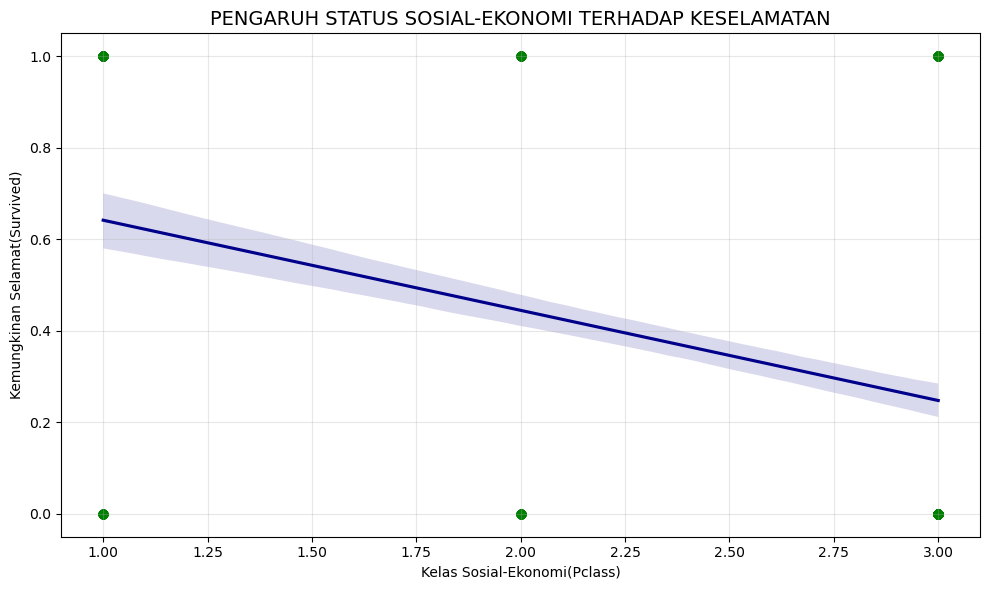

In [26]:
plt.figure(figsize=(10,6))
sns.regplot(
    x='Pclass',
    y='Survived',
    data=df,
    color='green',
    line_kws={'color':'darkblue'}
)

#Judul dan label
plt.title('PENGARUH STATUS SOSIAL-EKONOMI TERHADAP KESELAMATAN', fontsize=14)
plt.xlabel('Kelas Sosial-Ekonomi(Pclass)')
plt.ylabel('Kemungkinan Selamat(Survived)')
plt.grid(True,linestyle='-',alpha=0.3)
plt.tight_layout()
plt.show()

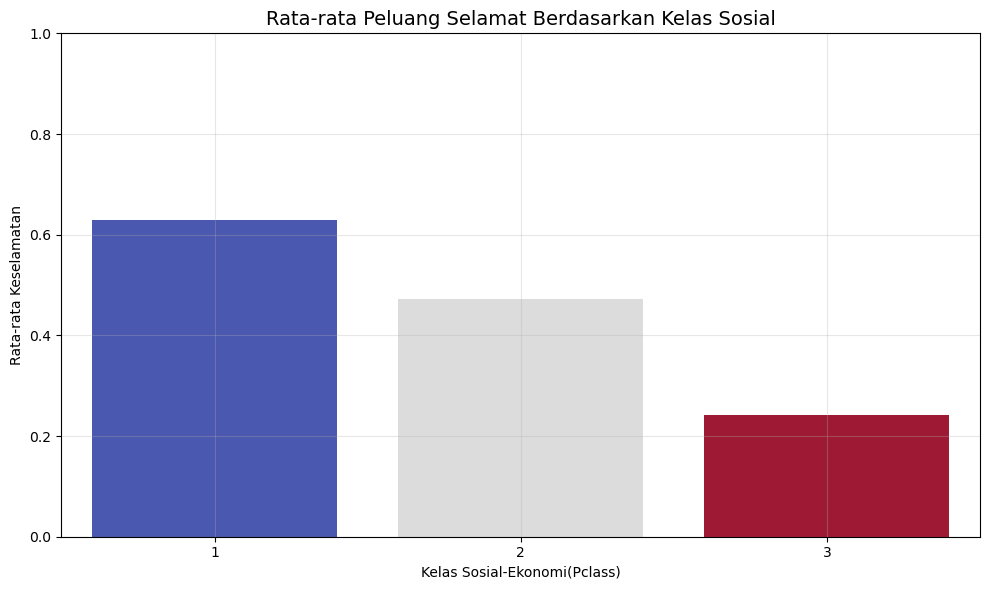

In [30]:
# Rata-rata Keselamatan Berdasarkan Pclass
survival_rate = df.groupby('Pclass') ['Survived'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    x='Pclass',
    y='Survived',
    hue='Pclass',
    data=survival_rate,
    palette='coolwarm',
    legend=False
)
plt.title('Rata-rata Peluang Selamat Berdasarkan Kelas Sosial',fontsize=14)
plt.xlabel('Kelas Sosial-Ekonomi(Pclass)')
plt.ylabel('Rata-rata Keselamatan')
plt.ylim(0,1)
plt.grid(True,linestyle='-',alpha=0.3)
plt.tight_layout()
plt.show()